<a href="https://colab.research.google.com/github/chrisvanrijn/Angular-spectrum-python/blob/master/AngularSpectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 80

variables

In [ ]:
N = 1000
Nz = 1000
lambda_ = 630 * 10**-9
Lx = 1 * 10**-3

dx = Lx / N
fx = np.linspace(1/(-2*dx), 1/(2*dx) - 1/Lx, N, dtype=np.complex64)
k = 2 * np.pi / lambda_

generate input

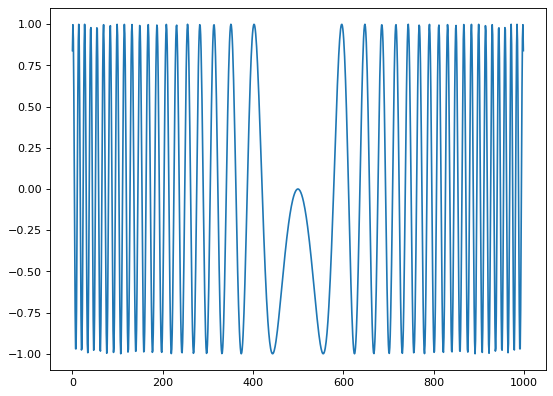

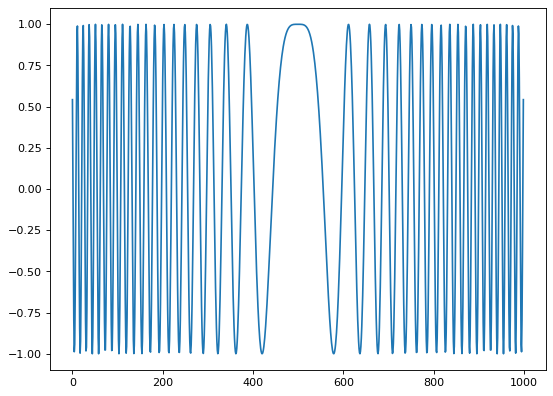

In [ ]:
# Square pulse
# pulsewidth = N / 20

# Ih1 = np.zeros(N)
# ds = pulsewidth / 2
# Ih1[int(N/2 - (ds+pulsewidth)):int(N/2 - ds)] = 1
# Ih1[int(N/2 + ds):int(N/2 + (ds+pulsewidth))] = 1
# pdist = Lx * 100


# Cosine
# p = Lx / 5
# ztalbot = 2 * p**2 / lambda_
# f = 1 / p
# Ih1 = 1 + np.cos(2 * np.pi * f * np.linspace(-N/2, N/2, N) * dx)
# pdist = ztalbot * 3


# Lens
t = np.linspace(-N/2, N/2, N) * dx
F = 1 * 10**-2
Ih1 = np.exp(t**2 * (-1j*k) / (2*F))
pdist = 20 * 10**-2


plt.figure()
plt.plot(np.imag(Ih1))
plt.figure()
plt.plot(np.real(Ih1))
pass

propagation

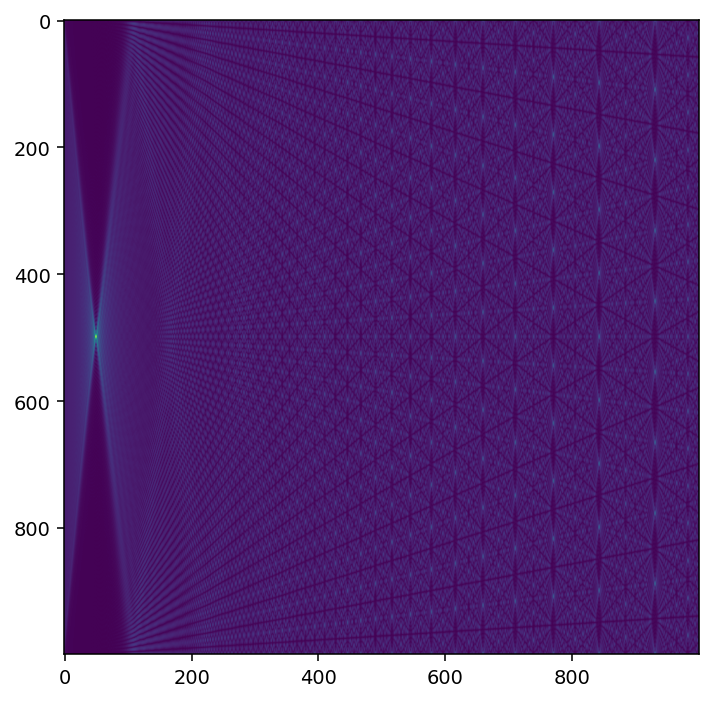

In [ ]:
pre = 1j * k * np.sqrt(1 - (lambda_ * fx)**2)
U1 = np.fft.fft(np.fft.fftshift(Ih1))
If = []

for z in np.linspace(0, pdist, Nz):
    H = np.fft.fftshift(np.exp(pre * z))
    
    U2 = H * U1
    U3 = np.fft.ifftshift(np.fft.ifft(U2.transpose()))

    If.append(np.abs(U3))


plt.figure(dpi=140)
plt.imshow(np.rot90(np.array(If))) # extent=[0, 1, 0, 1] If / np.linalg.norm(If))
plt.savefig('out.png')

# plt.figure()
# plt.plot(If[0])
# plt.figure()
# plt.plot(If[-1])
pass
